In [1]:
import numpy as np
import pandas as pd
from DG_classes import *
from DiffusionGeometry import *
import matplotlib.pyplot as plt
from DG_ml_stats import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.subplots as subplots
import matplotlib.animation as animation

from sklearn import manifold, decomposition
import plotly.express as px

from data_loader import *
from ripser import Rips
import gtda

Import the ABM data.

In [2]:
def read_ABM_data_full(noise):
    ids = [[45,46,47,48,49],
           [270,271,272,273,274],
           [495,496,497,498,499],
           [720,721,722,723,724],
           [945,946,947,948,949]]
    experiments = []
    for experiment in ids:
        runs = []
        for run in experiment:
            sim_PCs = []
            for time in range(300, 404, 4):
                df = pd.read_csv(f"./data/ABM_Coordinates/simID{run}_time{time}_{noise}percentNoise.csv")
                # X = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
                sim_PCs.append(df)
            runs.append(sim_PCs)
        experiments.append(runs)
    return experiments

all_ABM_dfs = read_ABM_data_full(2.5)


Code for producing GIFs of the simulations.

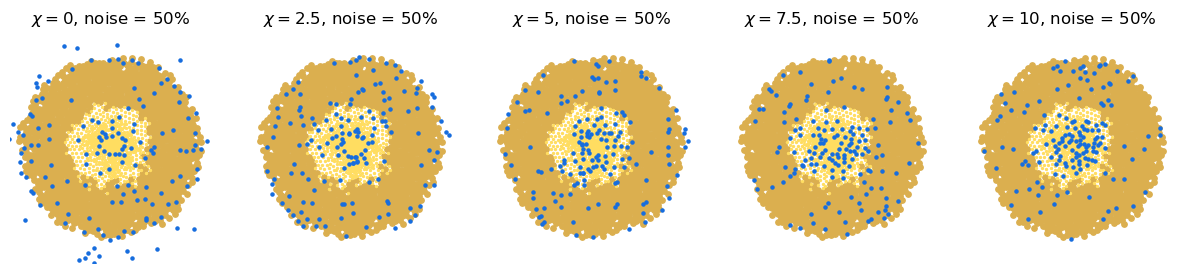

In [551]:
snr = 50

df = all_ABM_dfs[0][0][5]

data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
data_necro = df[df["PointType"] == "Necrotic"][["x", "y"]].values
data_tumour = df[df["PointType"] == "Viable tumour cell"][["x", "y"]].values

fig, axs = plt.subplots(1,5, figsize = (15,3))
for ax in axs:
    ax.set_xlim([-22, 22])
    ax.set_ylim([-22, 22])
    ax.scatter(data_tumour[:,0], data_tumour[:,1], c = '#dbaf4f', s = 15)
    ax.scatter(data_necro[:,0], data_necro[:,1], c = '#ffdd61', s = 2)
    ax.axis('off')
    ax.axis('equal')

scat0 = axs[0].scatter(1, 0, c = '#166dde', s = 5)
scat1 = axs[1].scatter(1, 0, c = '#166dde', s = 5)
scat2 = axs[2].scatter(1, 0, c = '#166dde', s = 5)
scat3 = axs[3].scatter(1, 0, c = '#166dde', s = 5)
scat4 = axs[4].scatter(1, 0, c = '#166dde', s = 5)

axs[0].set_title('$\chi=0$, noise = {}%'.format(snr))
axs[1].set_title('$\chi=2.5$, noise = {}%'.format(snr))
axs[2].set_title('$\chi=5$, noise = {}%'.format(snr))
axs[3].set_title('$\chi=7.5$, noise = {}%'.format(snr))
axs[4].set_title('$\chi=10$, noise = {}%'.format(snr))

def animate(i):
    df = all_ABM_dfs[0][0][i]
    data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
    X = np.c_[data_macro[:,0], data_macro[:,1]]
    scat0.set_offsets(X)

    df = all_ABM_dfs[1][0][i]
    data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
    X = np.c_[data_macro[:,0], data_macro[:,1]]
    scat1.set_offsets(X)

    df = all_ABM_dfs[2][0][i]
    data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
    X = np.c_[data_macro[:,0], data_macro[:,1]]
    scat2.set_offsets(X)

    df = all_ABM_dfs[3][0][i]
    data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
    X = np.c_[data_macro[:,0], data_macro[:,1]]
    scat3.set_offsets(X)

    df = all_ABM_dfs[4][0][i]
    data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
    X = np.c_[data_macro[:,0], data_macro[:,1]]
    scat4.set_offsets(X)

    return scat0, scat1, scat2, scat3, scat4

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=26, interval=50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=3,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('data/ABM_Coordinates/Parameter_Testing/animation.gif', writer=writer)

plt.show()

Figure for the paper.

Text(137.59722222222223, 0.5, 'Time = 100')

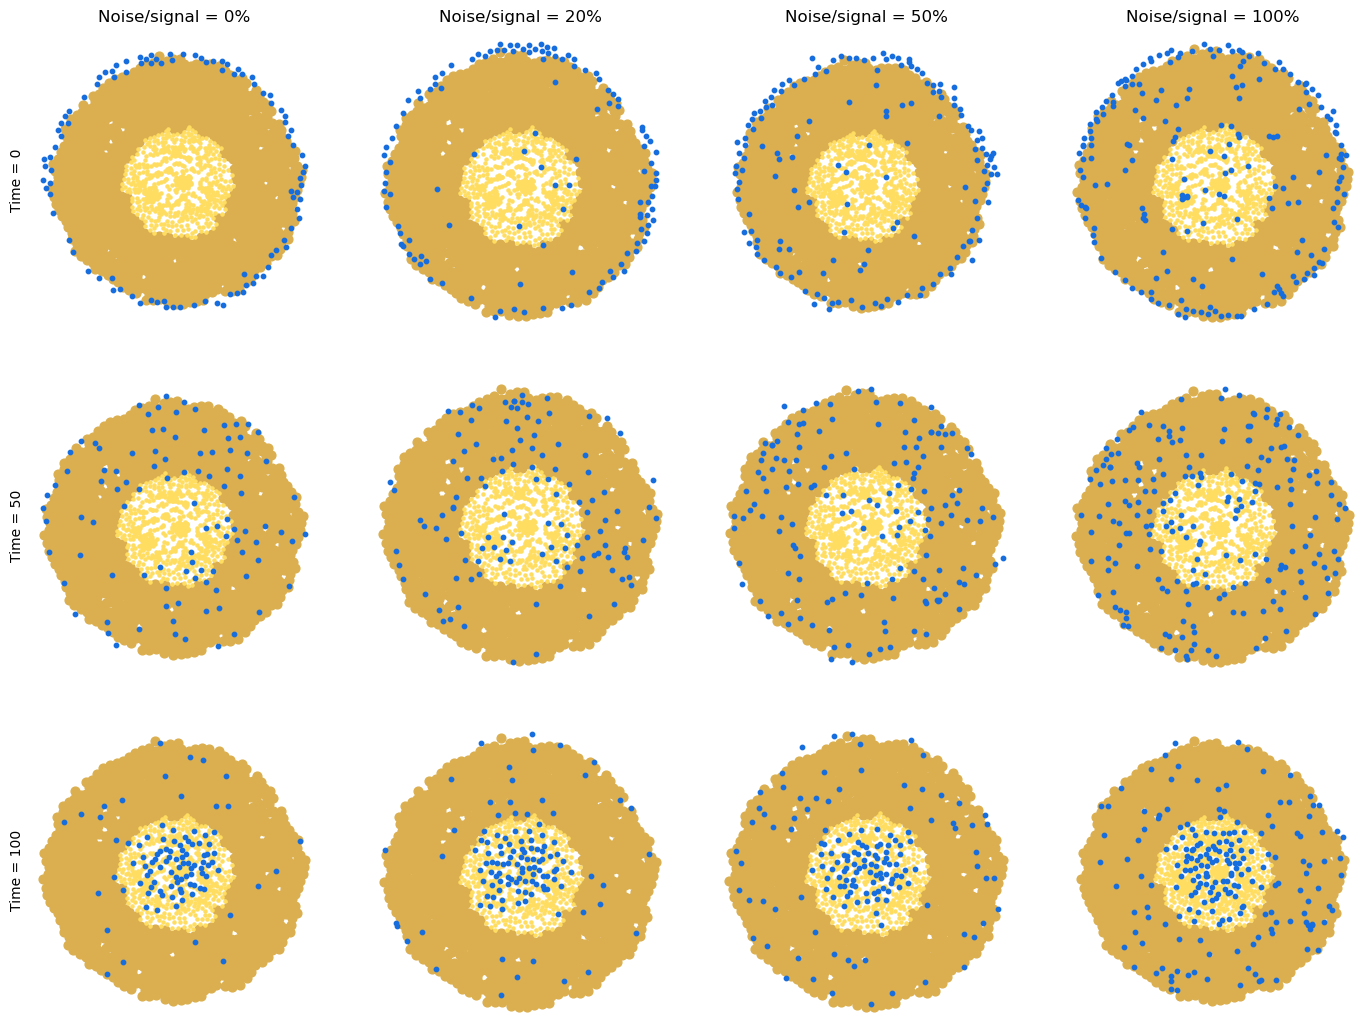

In [73]:

data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
data_necro = df[df["PointType"] == "Necrotic"][["x", "y"]].values
data_tumour = df[df["PointType"] == "Viable tumour cell"][["x", "y"]].values

fig, ax = plt.subplots(3,4,figsize = (14,10.5))
fig.tight_layout()

for j in range(4):
    for i in range(3):
        ax[i,j].scatter(data_tumour[:,0], data_tumour[:,1], c = '#dbaf4f', s = 40)
        ax[i,j].scatter(data_necro[:,0], data_necro[:,1], c = '#ffdd61', s = 5)

        df = read_ABM_data_full([0,1,2.5,5][j])[4][j][12*i+1]
        data_macro = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][["x", "y"]].values
        ax[i,j].scatter(data_macro[:,0], data_macro[:,1], c = '#166dde', s = 10)

        ax[i,j].set_xlim([-22, 22])
        ax[i,j].set_ylim([-22, 22])

        # ax[i,j].axis('off')
        ax[i,j].axis('equal')
        ax[i,j].set_yticklabels([])
        ax[i,j].set_xticklabels([])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines['bottom'].set_color('white')
        ax[i,j].spines['top'].set_color('white') 
        ax[i,j].spines['right'].set_color('white')
        ax[i,j].spines['left'].set_color('white')

ax[0,0].set_title('Noise/signal = {}%'.format(0))
ax[0,1].set_title('Noise/signal = {}%'.format(20))
ax[0,2].set_title('Noise/signal = {}%'.format(50))
ax[0,3].set_title('Noise/signal = {}%'.format(100))

ax[0,0].set_ylabel('Time = 0')
ax[1,0].set_ylabel('Time = 50')
ax[2,0].set_ylabel('Time = 100')

## PH features

In [9]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, PersistenceLandscape, BettiCurve, HeatKernel, PersistenceImage

In [10]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])

total_H1_persistence = []
largest_H1_bar = []
for noise_level in [0,1,2.5,5]:
    print('computing PH for {}% noise'.format(noise_level))

    # Import data and compute DG features
    experiments = read_ABM_data(noise_level)
    experiment_vals_total = []
    experiment_vals_longest = []
    for experiment in experiments:
        run_vals_total = []
        run_vals_longest = []
        for run in experiment:
            vals_total = []
            vals_longest = []
            for time_PC in run:
                diagrams = VR.fit_transform([time_PC])
                features_total = []
                features_longest = []
                # for rep in [PersistenceEntropy, PersistenceLandscape, BettiCurve, HeatKernel, PersistenceImage]:
                for rep in [BettiCurve]:
                    # features.append(rep().fit_transform(diagrams).flatten()).sum(axis=2)
                    # features.append(rep().fit_transform(diagrams).sum(axis=2))
                    persistence = diagrams[0][diagrams[0,:,2]==1] @ np.array([-1,1,0])
                    features_total.append(persistence.sum())
                    features_longest.append(persistence.max())
                vals_total.append(features_total)
                vals_longest.append(features_longest)
            run_vals_total.append(vals_total)
            run_vals_longest.append(vals_longest)
        experiment_vals_total.append(run_vals_total)
        experiment_vals_longest.append(run_vals_longest)
    experiment_vals_total = np.array(experiment_vals_total)
    experiment_vals_longest = np.array(experiment_vals_longest)

    # # Normalise feature
    # all_features = experiment_vals_ph.reshape(5*5*26,-1)
    # good_features = np.where(all_features.std(axis=0) > 1e-8)[0]
    # selected_features = all_features[:,good_features]
    # norm_features = selected_features - selected_features.mean(axis=0)
    # norm_features = norm_features / norm_features.std(axis=0)
    total_H1_persistence.append(experiment_vals_total.reshape(5,5,26))
    largest_H1_bar.append(experiment_vals_longest.reshape(5,5,26))


computing PH for 0% noise
computing PH for 1% noise
computing PH for 2.5% noise
computing PH for 5% noise


## DG features

If we do not know which features to look for, we can compute a large diffusion geometry feature vector and then use PCA to find the relevant features.

In [57]:
limits = {}
limits['eigenfunctions'] = 5
limits['1-eigenforms-div'] = 4
limits['1-eigenforms-curl'] = 2
limits['use curvature'] = False
limits['metric expansion'] = 5
limits['divergence-only threshold'] = 0.4

parameters = {}
parameters['n0'] = 30
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 8
parameters['alpha'] = 0
parameters['projection_tol'] = 1e-2

learned_features = []
feature_params = []

for noise_level in [0,1,2.5,5]:
    print('computing DG for {}% noise'.format(noise_level))

    # Import data and compute DG features
    experiments = read_ABM_data(noise_level)
    experiment_dg = []
    for experiment in experiments:
        run_vecs = []
        for run in experiment:
            vecs = []
            for time_PC in run:
                vec = feature_vector(DG(time_PC, parameters), limits)
                vecs.append(vec)
            run_vecs.append(vecs)
        experiment_dg.append(run_vecs)
    experiment_dg = np.array(experiment_dg)
    # print(experiment_dg.shape)

    # Normalise feature vectors
    all_features = experiment_dg.reshape(5*5*26,-1)
    good_features = np.where(all_features.std(axis=0) > 1e-8)[0]
    selected_features = all_features[:,good_features]
    norm_features = selected_features - selected_features.mean(axis=0)
    norm_features = norm_features / norm_features.std(axis=0)

    # Remove outliers (for more robust PCA)
    non_outlier_indices = np.where(np.linalg.norm(norm_features, axis=1) < 340)
    outliers_removed = norm_features[non_outlier_indices]
    # outliers_removed = selected_features[non_outlier_indices]
    # bias_vector = outliers_removed.mean(axis=0)
    # outliers_removed = outliers_removed - bias_vector
    # norm_features = selected_features - bias_vector
    # scale_factor = outliers_removed.std(axis=0)
    # outliers_removed = outliers_removed / scale_factor
    # norm_features = norm_features / scale_factor

    # Learn primary feature with PCA
    PCA_emb = decomposition.PCA(n_components=1)
    reduced = PCA_emb.fit_transform(outliers_removed)
    PCA1 = PCA_emb.components_[0]

    # Regularise by sparsifying the PCA coefficient vector
    largest_components = np.argsort(np.absolute(PCA1))[::-1][:10]
    pca_mask = np.zeros(PCA1.shape)
    pca_mask[largest_components] = 1
    PCA1 *= pca_mask
    PCA1 /= np.linalg.norm(PCA1)

    # Save the selected feature indices and the PCA coefficients vector
    feature_params.append([good_features, largest_components, PCA1])

    # Compute the learned PCA feature
    PCA_feature = np.dot(norm_features.reshape(5,5,26,-1), PCA1)
    learned_features.append(PCA_feature)

for f in learned_features:
    f -= f.mean()
    f /= f.std()

computing DG for 0% noise
computing DG for 1% noise
computing DG for 2.5% noise
computing DG for 5% noise


Investigate the learned feature from the feature labels

In [64]:
labels = string_feature_vector(parameters, limits)

indices, selected, PCA_vec = feature_params[3]

# print(PCA_vec[selected])
for x in zip(PCA_vec[selected], labels[indices][selected]):
    print(np.sign(x[0]),x[1])
    # print((x[0]),x[1])

# labels[indices][selected]

1.0 lam^1,curl_0
-1.0 exp(-1 lam^1,curl_0)
-1.0 exp(-10 lam^1,curl_0)
1.0 G1(d_0(phi_1), d_0(phi_1))
1.0 lam^0_1
-1.0 exp(-1 lam^0_1)
-1.0 exp(-10 lam^0_1)
-1.0 exp(-50 lam^0_1)
1.0 G1(d_0(phi_2), d_0(phi_2))
1.0 lam^0_2


Text(0.5, 1.0, 'Noise/signal = 100%')

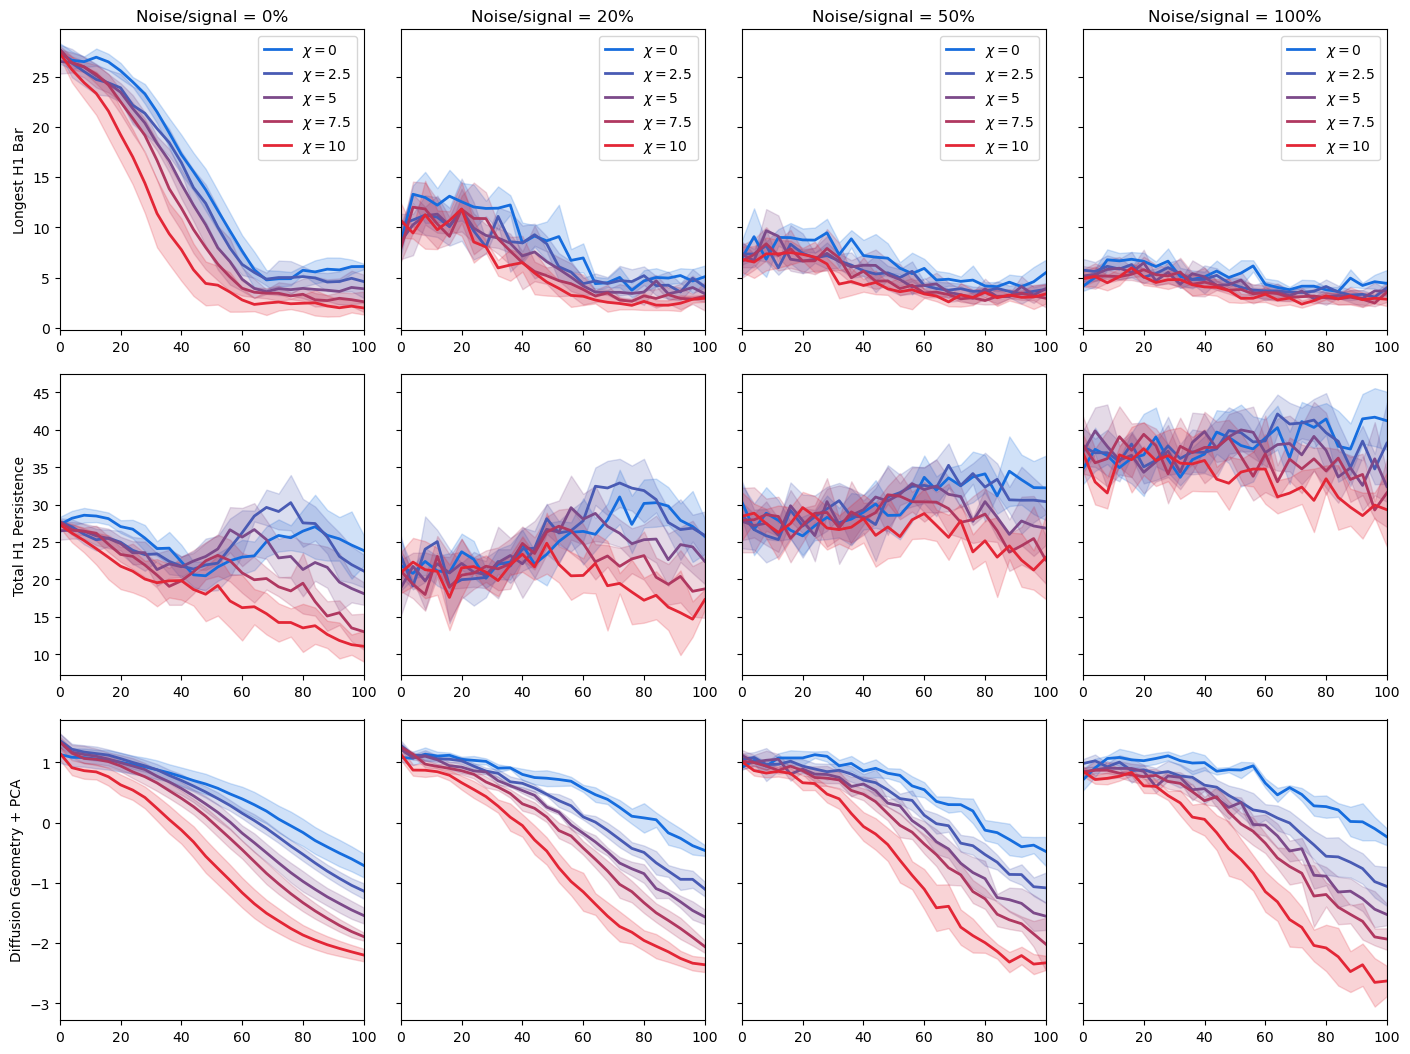

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
# "lightgray", 
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [largest_H1_bar, total_H1_persistence, learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(3,4,figsize = (14,10.5), sharey='row')
fig.tight_layout()
for i, f in enumerate([largest_H1_bar, total_H1_persistence, learned_features]):
    means = feature_means[i]
    stds = feature_stds[i]
    for j in range(4):
        chemo = 0
        for mean, std in zip(means[j],stds[j]):
            if i ==2:
                mean = -mean
            ax[i,j].plot(x, mean, c = cols[chemo], linewidth = 2, label = '$\chi = {}$'.format([0,2.5,5,7.5,10][chemo]))
            ax[i,j].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
            ax[i,j].set_xlim(0,100)
            chemo += 1
        if i == 0:
            ax[i,j].legend()

ax[0,0].set_ylabel('Longest H1 Bar')
ax[1,0].set_ylabel('Total H1 Persistence')
ax[2,0].set_ylabel('Diffusion Geometry + PCA')

ax[0,0].set_title('Noise/signal = 0%')
ax[0,1].set_title('Noise/signal = 20%')
ax[0,2].set_title('Noise/signal = 50%')
ax[0,3].set_title('Noise/signal = 100%')

## DG computation only - no normalisation or selection

In [43]:
limits = {}
limits['eigenfunctions'] = 5
limits['1-eigenforms-div'] = 4
limits['1-eigenforms-curl'] = 2
limits['use curvature'] = False
limits['metric expansion'] = 5
limits['divergence-only threshold'] = 0.4

parameters = {}
parameters['n0'] = 30
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 8
parameters['alpha'] = 0
parameters['projection_tol'] = 1e-2

raw_dg_features = []

for noise_level in [0,1,2.5,5]:
    print('computing DG for {}% noise'.format(noise_level))

    # Import data and compute DG features
    experiments = read_ABM_data(noise_level)
    experiment_dg = []
    for experiment in experiments:
        run_vecs = []
        for run in experiment:
            vecs = []
            for time_PC in run:
                vec = feature_vector(DG(time_PC, parameters), limits)
                vecs.append(vec)
            run_vecs.append(vecs)
        experiment_dg.append(run_vecs)
    experiment_dg = np.array(experiment_dg)
    raw_dg_features.append(experiment_dg)


# for f in learned_features:
#     f -= f.mean()
#     f /= f.std()

computing DG for 0% noise
computing DG for 1% noise
computing DG for 2.5% noise
computing DG for 5% noise


In [23]:
raw_dg_features[0].shape

(5, 5, 26, 38744)

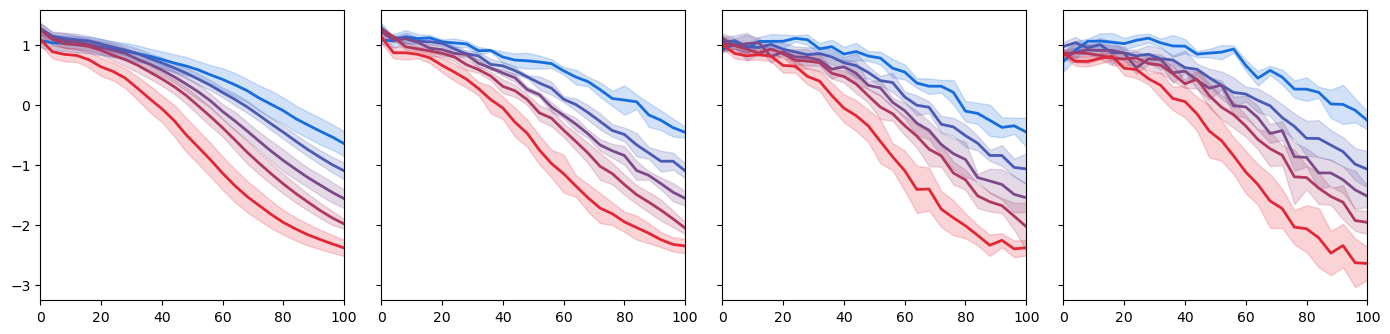

In [56]:
learned_features_2 = []

for raw_features in raw_dg_features:

    # Normalise feature vectors
    all_features = raw_features.reshape(5*5*26,-1)
    good_features = np.where(all_features.std(axis=0) > 1e-8)[0]
    selected_features = all_features[:,good_features]
    norm_features = selected_features - selected_features.mean(axis=0)
    norm_features = norm_features / norm_features.std(axis=0)

    # Remove outliers (for more robust PCA)
    non_outlier_indices = np.where(np.linalg.norm(norm_features, axis=1) < 340)
    outliers_removed = norm_features[non_outlier_indices]
    # outliers_removed = selected_features[non_outlier_indices]
    # bias_vector = outliers_removed.mean(axis=0)
    # outliers_removed = outliers_removed - bias_vector
    # norm_features = selected_features - bias_vector
    # scale_factor = outliers_removed.std(axis=0)
    # outliers_removed = outliers_removed / scale_factor
    # norm_features = norm_features / scale_factor

    # Learn primary feature with PCA
    PCA_emb = decomposition.PCA(n_components=1)
    reduced = PCA_emb.fit_transform(outliers_removed)
    PCA1 = PCA_emb.components_[0]

    # Regularise by sparsifying the PCA coefficient vector
    largest_components = np.argsort(np.absolute(PCA1))[::-1][:12]
    pca_mask = np.zeros(PCA1.shape)
    pca_mask[largest_components] = 1
    PCA1 *= pca_mask
    PCA1 /= np.linalg.norm(PCA1)

    # Save the selected feature indices and the PCA coefficients vector
    feature_params.append([good_features, largest_components, PCA1])

    # Compute the learned PCA feature
    PCA_feature = np.dot(norm_features.reshape(5,5,26,-1), PCA1)
    learned_features_2.append(PCA_feature)

for f in learned_features_2:
    f -= f.mean()
    f /= f.std()


colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [learned_features_2]:
    means = []
    stds = []
    for vals in features:
        means.append(-vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(1,4,figsize = (14,3.5), sharey='row')
fig.tight_layout()

means = feature_means[0]
stds = feature_stds[0]
for j in range(4):
    chemo = 0
    for mean, std in zip(means[j],stds[j]):
        ax[j].plot(x, mean, c = cols[chemo], linewidth = 2, label = '$\chi = {}$'.format([0,2.5,5,7.5,10][chemo]))
        ax[j].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
        ax[j].set_xlim(0,100)
        chemo += 1


Text(0.5, 1.0, 'noise = 100%')

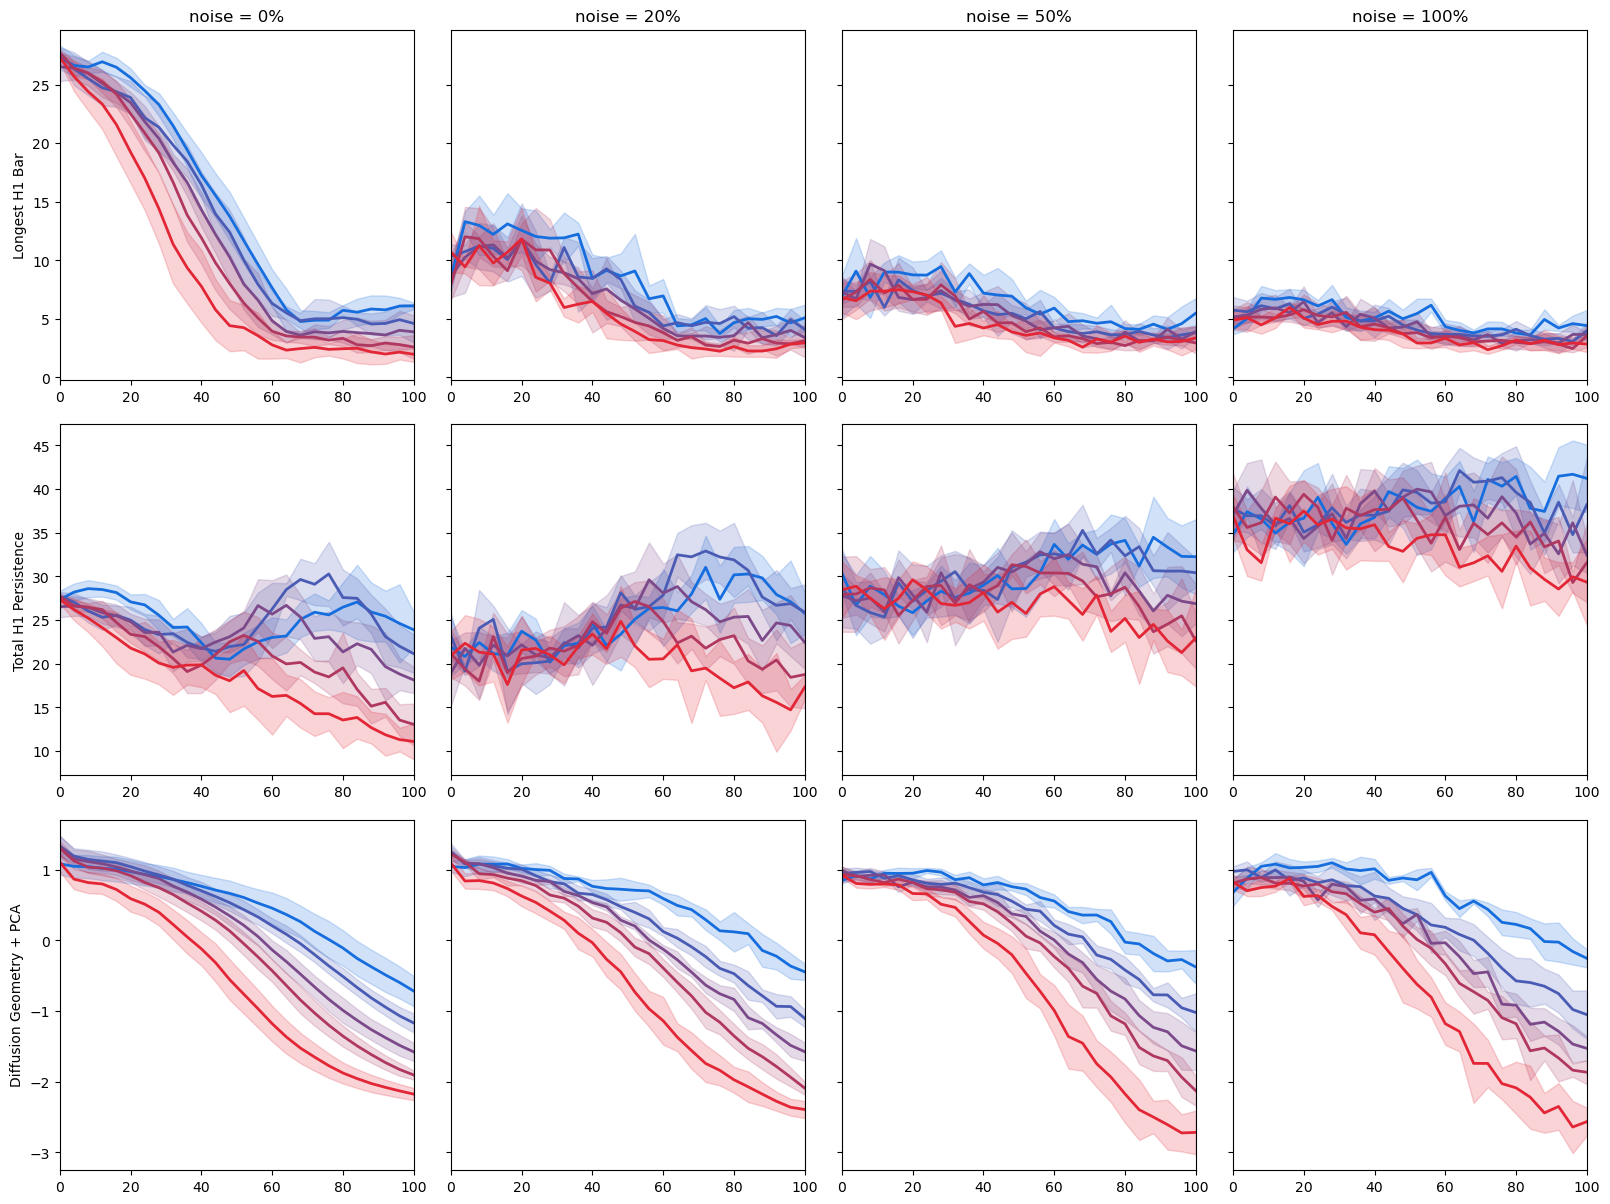

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
# "lightgray", 
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [largest_H1_bar, total_H1_persistence, learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(3,4,figsize = (16,12), sharey='row')
fig.tight_layout()
for i, f in enumerate([largest_H1_bar, total_H1_persistence, learned_features]):
    means = feature_means[i]
    stds = feature_stds[i]
    for j in range(4):
        chemo = 0
        for mean, std in zip(means[j],stds[j]):
            if i ==2:
                mean = -mean
            ax[i,j].plot(x, mean, c = cols[chemo], linewidth = 2)
            ax[i,j].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
            ax[i,j].set_xlim(0,100)
            chemo += 1

ax[0,0].set_ylabel('Longest H1 Bar')
ax[1,0].set_ylabel('Total H1 Persistence')
ax[2,0].set_ylabel('Diffusion Geometry + PCA')

ax[0,0].set_title('noise = 0%')
ax[0,1].set_title('noise = 20%')
ax[0,2].set_title('noise = 50%')
ax[0,3].set_title('noise = 100%')

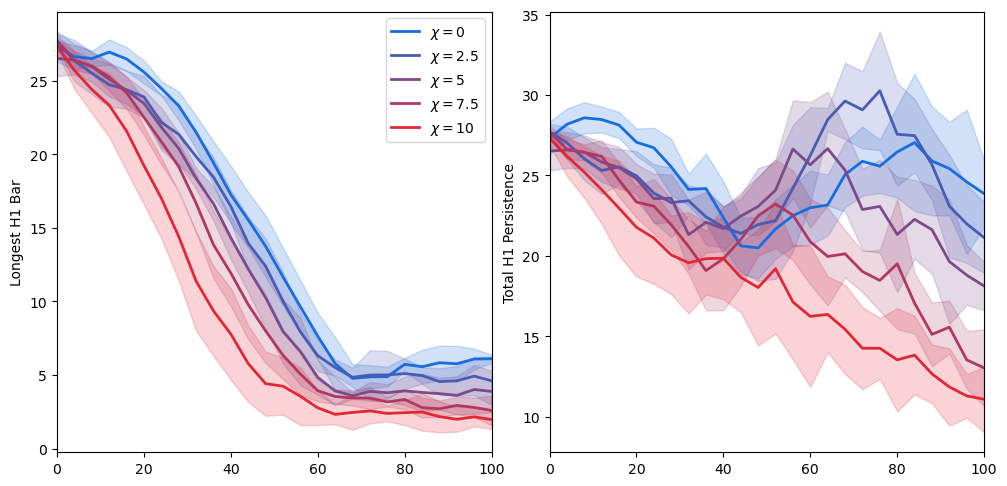

In [58]:
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [largest_H1_bar, total_H1_persistence, learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout()
for i, f in enumerate([largest_H1_bar, total_H1_persistence]):
    means = feature_means[i]
    stds = feature_stds[i]
    for j in [0]:
        chemo = 0
        for N, (mean, std) in enumerate(zip(means[j],stds[j])):
            if i ==2:
                mean = -mean
            ax[i].plot(x, mean, c = cols[chemo], linewidth = 2, label = '$\chi = {}$'.format([0,2.5,5,7.5,10][chemo]))
            ax[i].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
            ax[i].set_xlim(0,100)
            chemo += 1

ax[0].set_ylabel('Longest H1 Bar')
ax[1].set_ylabel('Total H1 Persistence')
ax[0].legend()


Text(0.5, 1.0, 'noise = 100%')

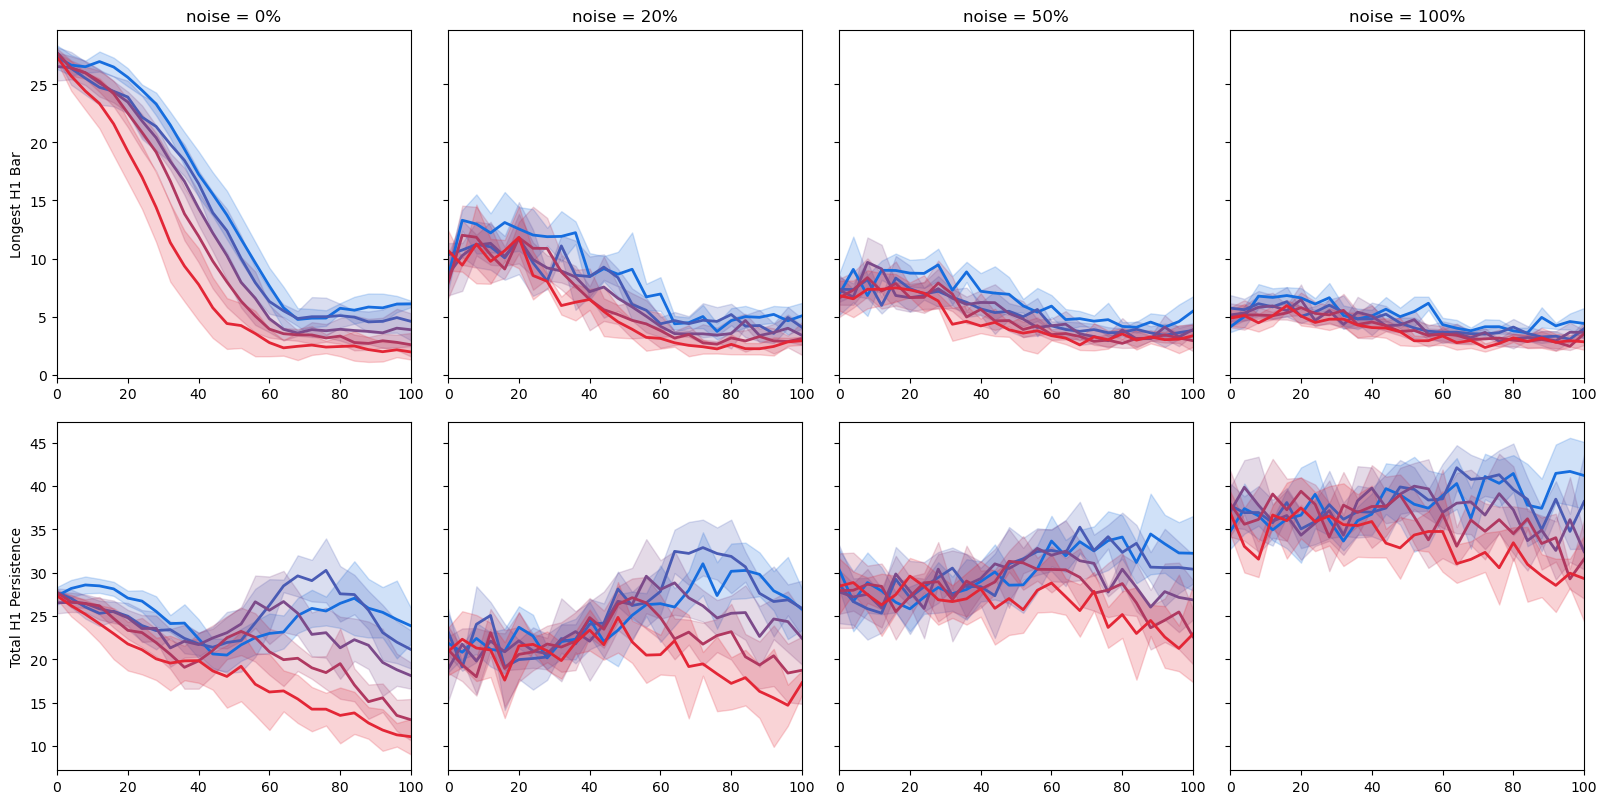

In [36]:
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [largest_H1_bar, total_H1_persistence, learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(2,4,figsize = (16,8), sharey='row')
fig.tight_layout()
for i, f in enumerate([largest_H1_bar, total_H1_persistence]):
    means = feature_means[i]
    stds = feature_stds[i]
    for j in range(4):
        chemo = 0
        for N, (mean, std) in enumerate(zip(means[j],stds[j])):
            if i ==2:
                mean = -mean
            ax[i,j].plot(x, mean, c = cols[chemo], linewidth = 2)
            ax[i,j].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
            ax[i,j].set_xlim(0,100)
            chemo += 1

ax[0,0].set_ylabel('Longest H1 Bar')
ax[1,0].set_ylabel('Total H1 Persistence')

ax[0,0].set_title('noise = 0%')
ax[0,1].set_title('noise = 20%')
ax[0,2].set_title('noise = 50%')
ax[0,3].set_title('noise = 100%')


Text(0.5, 1.0, 'noise = 100%')

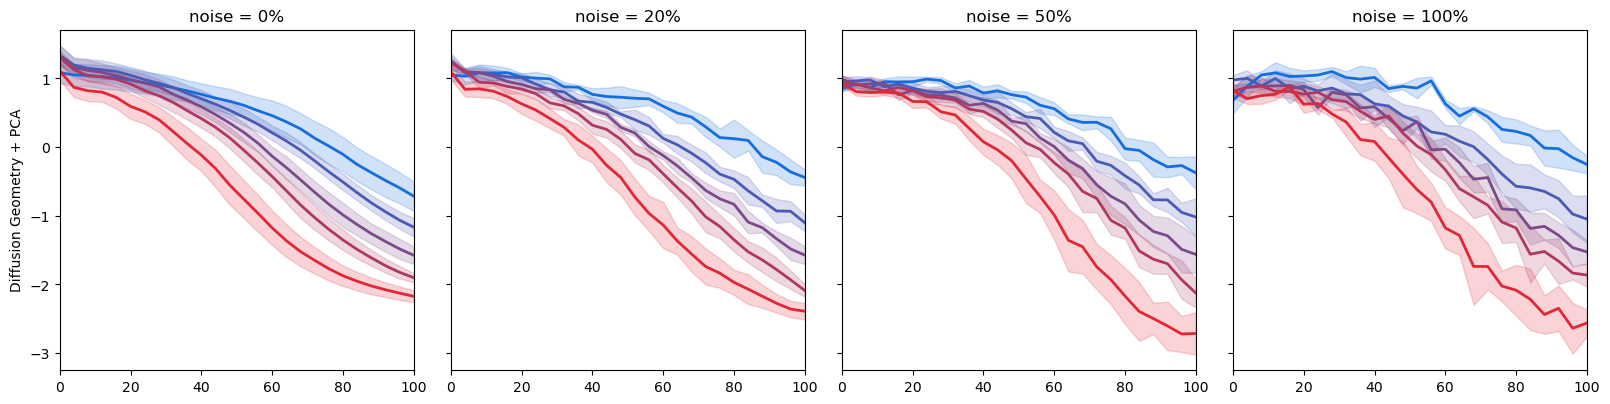

In [44]:
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(1,4,figsize = (16,4), sharey='row')
fig.tight_layout()
for i, f in enumerate([learned_features]):
    means = feature_means[i]
    stds = feature_stds[i]
    for j in range(4):
        chemo = 0
        for N, (mean, std) in enumerate(zip(means[j],stds[j])):
            if i ==0:
                mean = -mean
            ax[j].plot(x, mean, c = cols[chemo], linewidth = 2)
            ax[j].fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
            ax[j].set_xlim(0,100)
            chemo += 1

ax[0].set_ylabel('Diffusion Geometry + PCA')
ax[0].set_title('noise = 0%')
ax[1].set_title('noise = 20%')
ax[2].set_title('noise = 50%')
ax[3].set_title('noise = 100%')


Text(37.597222222222214, 0.5, 'Diffusion Geometry + PCA')

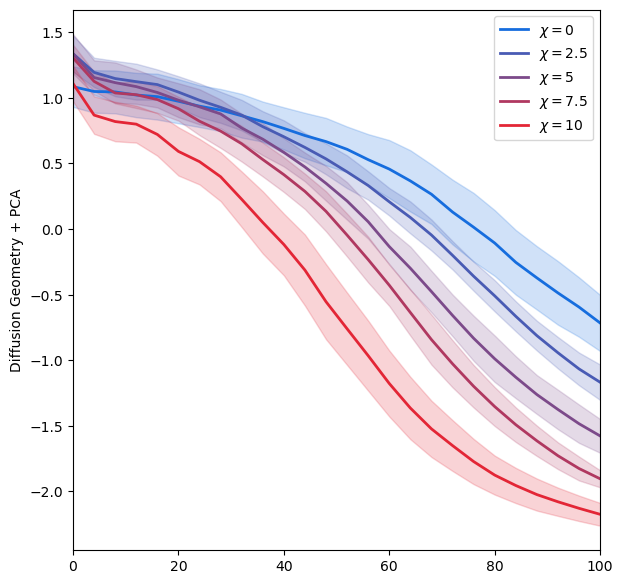

In [45]:
colorscale=["#166dde", "#e32636"]
cmap = LinearSegmentedColormap.from_list('cbar_MR_B', colorscale, N=5)
cols = [cmap(i) for i in range(cmap.N)]

feature_means = []
feature_stds = []

for features in [learned_features]:
    means = []
    stds = []
    for vals in features:
        means.append(vals.mean(axis=1))
        stds.append(vals.std(axis=1))
    feature_means.append(means)
    feature_stds.append(stds)

x = np.arange(0,104,4)
fig, ax = plt.subplots(figsize = (6,6))
fig.tight_layout()
means = feature_means[0]
stds = feature_stds[0]
chemo = 0
for N, (mean, std) in enumerate(zip(means[0],stds[0])):
    if i ==0:
        mean = -mean
    ax.plot(x, mean, c = cols[chemo], linewidth = 2, label = '$\chi = {}$'.format([0,2.5,5,7.5,10][chemo]))
    ax.fill_between(x, mean-std, mean+std, color = cols[chemo], alpha=0.2)
    ax.set_xlim(0,100)
    chemo += 1
ax.legend()
ax.set_ylabel('Diffusion Geometry + PCA')


In [251]:
PCA_feature.flatten()

px.scatter(x = PCA_feature.flatten()[outlier_indices], y = reduced[:,1], color = time_colour)